### 作業
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次作業請改用**手寫辨識資料集**，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

In [ ]:
# 參考寫法：https://machine-learning-python.kspax.io/datasets/ex1_the_digits_dataset

In [1]:
from sklearn import datasets, metrics
import matplotlib.pyplot as plt
%matplotlib inline

#載入數字資料集
digits = datasets.load_digits()

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

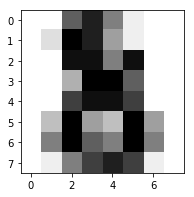

In [3]:
#畫出第一個圖片
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [ ]:
'''
digits = datasets.load_digits() 將一個dict型別資料存入digits，我們可以用下面程式碼來觀察裏面資料
'''

In [4]:
for key,value in digits.items() :
    try:
        print (key,value.shape)
    except:
        print (key)

data (1797, 64)
target (1797,)
target_names (10,)
images (1797, 8, 8)
DESCR


In [ ]:
'''
1. images (1797, 8, 8) = 共有 1797 張影像，影像大小為 8x8
2. data (1797, 64) = data 則是將8x8的矩陣攤平成64個元素之一維向量
3. target_names (10,) = 說明10種分類之對應 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
4. DESCR = 資料之描述
5. target (1797,) = 記錄1797張影像各自代表那一個數字
'''

In [ ]:
# 接下來我們試著以下面指令來觀察資料檔，每張影像所對照的實際數字存在digits.target變數中

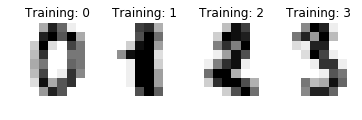

In [5]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [ ]:
# 將這個機器學習資料之描述檔顯示出來
# print(digits['DESCR'])

'''
這個描述檔說明了這個資料集是在 1998年時建立的，
由E. Alpaydin, C. Kaynak ，Department of Computer Engineering Bogazici University, Istanbul Turkey 建立的。

數字的筆跡總共來自43個人，一開始取像時為32x32的點陣影像，之後經運算處理形成 8x8影像，其中灰階記錄的範圍則為 0~16的整數。

'''

In [6]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=4)

# 建立模型
clf = GradientBoostingClassifier()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [7]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9666666666666667


In [ ]:
# 圖像化參考：https://www.youtube.com/watch?v=PVPrMSIQEcU

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[47,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 1, 37,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 40,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 40,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 42,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1, 48]], dtype=int64)

Text(69.0, 0.5, '實際')

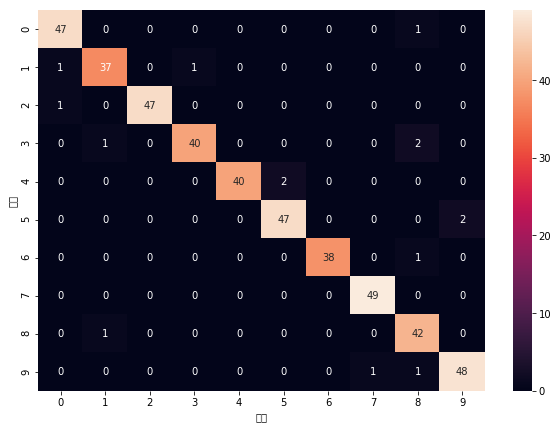

In [15]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('預測')
plt.ylabel('實際')